## REGISTER NO :212008

## PROGRAM TITLE:	Write a Python program to demonstrate K-means clustering algorithm. Also visualize the same

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
from sklearn.datasets import fetch_california_housing

In [2]:
data = fetch_california_housing()

In [3]:
df=pd.DataFrame(data['data'],columns=data['feature_names'])
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [4]:
x = df.iloc[:,6:8]
x

,Latitude,Longitude
0,37.88,-122.23
1,37.86,-122.22
2,37.85,-122.24
3,37.85,-122.25
4,37.85,-122.25
...,...,...
20635,39.48,-121.09
20636,39.49,-121.21
20637,39.43,-121.22
20638,39.43,-121.32


In [5]:
kmeans = KMeans(4)
kmeans.fit(x)

KMeans(n_clusters=4)

In [6]:
clusters = kmeans.fit_predict(x)
clusters

array([0, 0, 0, ..., 0, 0, 0])

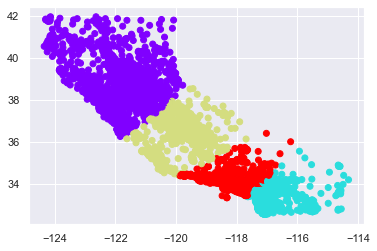

In [7]:
data_with_clusters = df.copy()
data_with_clusters['Clusters'] = clusters 
plt.scatter(data_with_clusters['Longitude'],data_with_clusters['Latitude'],c=data_with_clusters['Clusters'],cmap='rainbow')

Text(0, 0.5, 'WCSS')

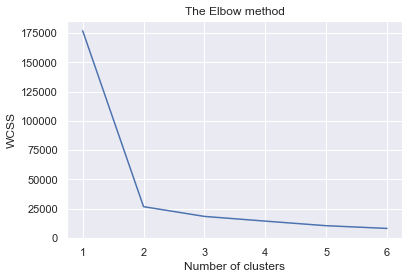

In [8]:
wcss=[]
for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title('The Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')